### Data cleaning

#### To address the aspects of data integrity, missing data handling, duplicate removal, standardization, and outlier detection, 
#### we can apply various techniques using Python and libraries such as pandas, scikit-learn, and seaborn. 

### Importing necessary libraries

In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [73]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\AB_NYC_2019.csv")

In [74]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [75]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [76]:
df.shape

(48895, 16)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [78]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [79]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [80]:
#check for missing values
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [81]:
#Imputing missing values

In [82]:
specific_string = 'Unknown'
df['name'].fillna(specific_string, inplace=True)

In [83]:
specific_string_2 = 'Unknown'
df['host_name'].fillna(specific_string_2, inplace=True)

In [84]:
df['last_review'].fillna(method='ffill',inplace=True)

In [131]:
df.fillna(df.mean(),inplace=True)

In [98]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

###  Duplicate Removal:
#### Identifying and eliminating duplicate records helps maintain data uniqueness. We can use pandas to detect and remove duplicates:

In [87]:
print("Number of duplicates:",df.duplicated().sum())

Number of duplicates: 0


In [88]:
df1=df[['latitude','longitude','price','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [89]:
#Standardization
scaler = StandardScaler()
df1_sc = scaler.fit_transform(df1)

Text(0.5, 1.0, 'availability_365')

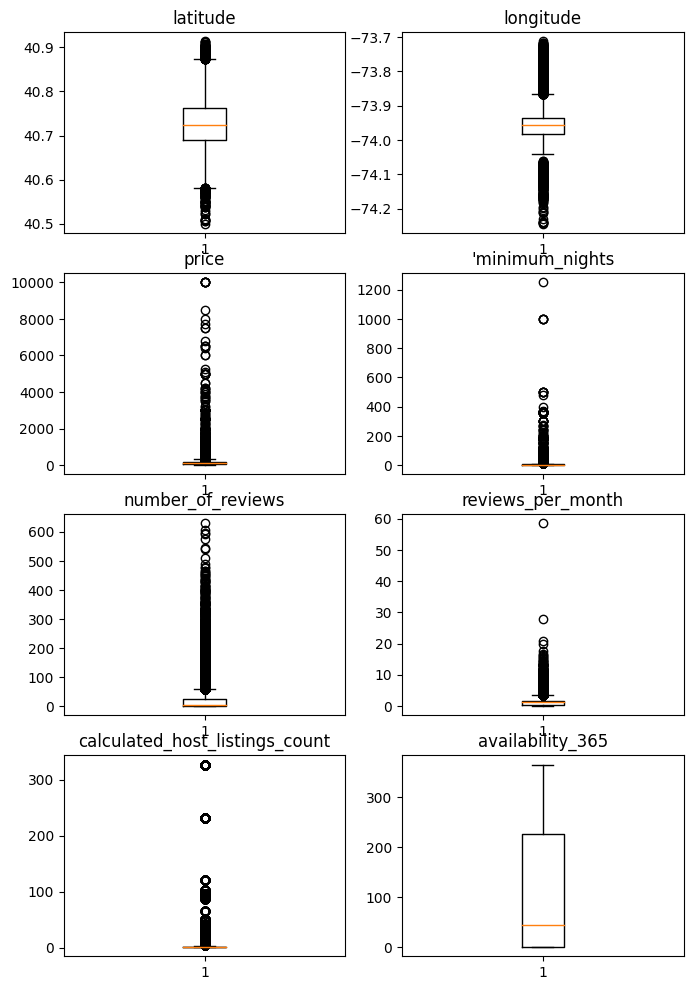

In [129]:
#creating boxplots for numerical columns
fig,ax=plt.subplots(4,2,figsize=(8,12))
ax[0,0].boxplot(x='latitude',data=df1)
ax[0,0].set_title("latitude")
ax[0,1].boxplot(x='longitude',data=df1)
ax[0,1].set_title("longitude")
ax[1,0].boxplot(x='price',data=df1)
ax[1,0].set_title("price")
ax[1,1].boxplot(x='minimum_nights',data=df1)
ax[1,1].set_title("'minimum_nights")
ax[2,0].boxplot(x='number_of_reviews',data=df1)
ax[2,0].set_title("number_of_reviews")
ax[2,1].boxplot(x='reviews_per_month',data=df1)
ax[2,1].set_title("reviews_per_month")
ax[3,0].boxplot(x='calculated_host_listings_count',data=df1)
ax[3,0].set_title("calculated_host_listings_count")
ax[3,1].boxplot(x='availability_365',data=df1)
ax[3,1].set_title("availability_365")

<Axes: xlabel='price'>

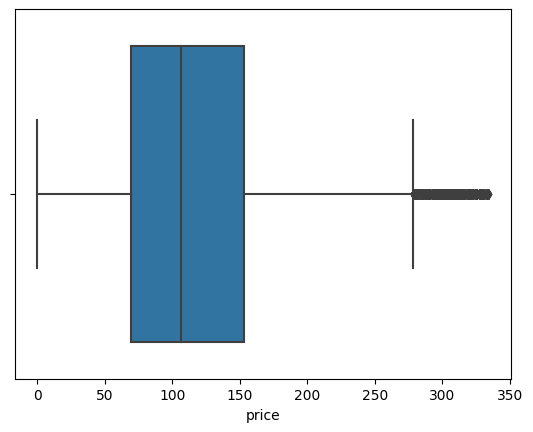

In [128]:
sns.boxplot(x='price',data=df)

In [92]:
# Calculate the IQR
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
print("Q1 : ",Q1)
print("Q3 : ",Q3)
print("Inter Quartile Range : ",IQR)

Q1 :  69.0
Q3 :  175.0
Inter Quartile Range :  106.0


In [93]:
# Determine outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['price'] < lower_bound) | (df['price'] > upper_bound)
print("Lower bound value:",lower_bound)
print("Upper bound value:",upper_bound)

Lower bound value: -90.0
Upper bound value: 334.0


In [94]:
df.loc[df['price']>upper_bound]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,03-11-2018,0.120000,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,04-08-2016,0.240000,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,18-05-2019,0.550000,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,09-08-2017,0.060000,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,30-12-2018,0.240000,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,07-07-2019,1.373221,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,07-07-2019,1.373221,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,07-07-2019,1.373221,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,07-07-2019,1.373221,1,9


In [95]:
df.loc[df['price']<lower_bound]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [130]:
#Imputing outliers
df.loc[df['price']>upper_bound]=np.mean(df['price'])

In [97]:
df.loc[4567,:]

id                                                                        3185489.0
name                              Private Bedroom in Nice Apt. Near Riverside Park!
host_id                                                                  16142344.0
host_name                                                                   Jeffrey
neighbourhood_group                                                       Manhattan
neighbourhood                                                                Harlem
latitude                                                                   40.82165
longitude                                                                 -73.95491
room_type                                                              Private room
price                                                                          70.0
minimum_nights                                                                  3.0
number_of_reviews                                                           